In [1]:
# Import libraries 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from library.sb_utils import save_file

In [15]:
# Load raman diabetic datafiles here. ../raw_data/Raman_Diabet

path = '../raw_data/Raman_Covid'

# There are five raman spectra corresponding to measurements on different body parts. 
# 1. vein 2. earLobe 3. innerArm 4.thumbnail

# Set file path for each of the spectra files: vein_path,earLobe_path,innerArm_path,thumbnail_path
vein_path = path + '/vein.csv'
earLobe_path = path + '/earLobe.csv'
innerArm_path = path + '/innerArm.csv'
thumbnail_path = path + '/thumbnail.csv'
covid_path = path1 + '/covid_and_healthy_spectra.csv'

# Start looding the spectra file by loading the data from vein.

data_vein = pd.read_csv(vein_path)
covid_data = pd.read_csv(covid_path)
covid_data.head()


,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,diagnostic
0,0.0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,-0.031603,...,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.0,Healthy
1,0.0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,-0.027075,...,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.0,Healthy
2,0.0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,-0.029198,...,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.0,Healthy
3,0.0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,-0.040699,...,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000071,0.0,Healthy
4,0.0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,-0.066886,...,-0.000088,0.000891,0.000942,0.001294,0.001878,0.001739,0.001946,0.001301,0.0,Healthy


In [3]:
# Quickly audit data: data_vein.info()
data_vein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB


It looks like our data consists of 3162 columns and 21 rows. It might be helpful to transpose our data so that we can audit it better.

In [4]:
# Transpose the data and display quick information: data_vein.T.info()
data_vein.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, patientID to Var3161
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3161 non-null   object
 1   1       3162 non-null   object
 2   2       3162 non-null   object
 3   3       3162 non-null   object
 4   4       3162 non-null   object
 5   5       3162 non-null   object
 6   6       3162 non-null   object
 7   7       3162 non-null   object
 8   8       3162 non-null   object
 9   9       3162 non-null   object
 10  10      3162 non-null   object
 11  11      3162 non-null   object
 12  12      3162 non-null   object
 13  13      3162 non-null   object
 14  14      3162 non-null   object
 15  15      3162 non-null   object
 16  16      3162 non-null   object
 17  17      3162 non-null   object
 18  18      3162 non-null   object
 19  19      3162 non-null   object
 20  20      3162 non-null   object
dtypes: object(21)
memory usage: 672.5+ KB


With the exception of one data point, we do not have any missing values. The only null value we have is on row zero and column 0.

In [5]:
# Quickly look first few entries of data

data_vein.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.8,181.8,181.8,181.8,181.8,181.8,181.8,181.8,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,246.2,246.2,246.2,246.2,246.2,246.2,246.2,246.2,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,164.6,164.6,164.6,164.6,164.6,164.6,164.6,164.6,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,293.8,293.8,293.8,293.8,293.8,293.8,293.8,293.8,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Get the number of columns: cols
cols = data_vein.shape[1]
print(cols)
# Get ramanshift wavenumbers: ramanshift
ramanshift = data_vein.iloc[0,2:].values
print(type(ramanshift))
print(ramanshift)

3162
<class 'numpy.ndarray'>
[0.0 1.0 2.0 ... 3157 3158 3159]


In [7]:
# Column has_DM2 is the target feature. Let us check what unique values it has.
data_vein['has_DM2'].unique()
# The column consists of one missing value and it has binary values of 1 or 0 corresponding to diabetic or not.


array([nan,  1.,  0.])

In [8]:
# The first row consists of nan and other values are simply serail number ranging from 0:3159. 
# The first could be dropped : data_vein_freeNA

data_vein_freeNA = data_vein.dropna(axis=0)
data_vein_freeNA.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
1,DM201,1.0,181.8,181.8,181.8,181.8,181.8,181.8,181.8,181.8,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,246.2,246.2,246.2,246.2,246.2,246.2,246.2,246.2,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,164.6,164.6,164.6,164.6,164.6,164.6,164.6,164.6,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,293.8,293.8,293.8,293.8,293.8,293.8,293.8,293.8,...,0,0,0,0,0,0,0,0,0,0
5,DM205,1.0,265.5,265.5,265.5,265.5,265.5,265.5,265.5,265.5,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# convert dataframe to numpy matrices
cols = data_vein_freeNA.shape[1]

X = np.matrix(data_vein_freeNA.iloc[:,2:cols].values)
y = np.array(data_vein_freeNA.iloc[:,1].values) # second column is y labeel

labels = list(set(y))

(1, 3160)


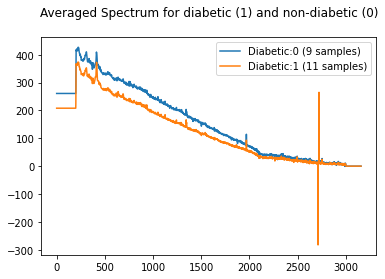

In [10]:
for c in labels: 
    Xc = X[y == c]
    yc = y[y == c] 
    plt.plot(ramanshift, np.mean(Xc,axis=0).tolist()[0], label= 'Diabetic:' + (str(int(c))) + 
    ' (' + str(len(yc)) + ' samples)')
    plt.legend()
    
plt.title(u'Averaged Spectrum for diabetic (1) and non-diabetic (0)\n') ;  
print(np.mean(X[y==1],axis=0).shape)

In [41]:
# convert dataframe to numpy matrices
cols = covid_data.shape[1]
cols = cols-2
cyend = cols + 2
#print(covid_data.shape)
X = np.matrix(covid_data.iloc[:,2:cols].values)
y = np.array(covid_data.iloc[:,900].values) # second column is y labeel

labels = list(set(y))
print(labels)
#covid_data.iloc[:,900].values

['Healthy', 'SARS-CoV-2']


(1, 897)


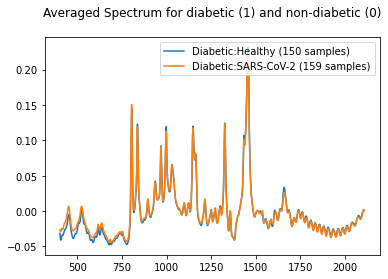

In [46]:
X_names = list(map(float, covid_data.columns.values[1:898])) # X_names = np.array(list(da
#print(X_names)
for c in labels: 
#    if c == 'Healthy':
        Xc = X[y == c]
        yc = y[y == c] 
        plt.plot(X_names, np.mean(Xc,axis=0).tolist()[0], label= 'Diabetic:' + str(c) +  
                 ' (' + str(len(yc)) + ' samples)')
        plt.legend()
    
plt.title(u'Averaged Spectrum for diabetic (1) and non-diabetic (0)\n') ;  
print(np.mean(X[y==1],axis=0).shape)